# Oakland Crime Statistics 2011 to 2016
数据集共 6 个文件，分别表示 2011～2016 间一年的数据。但是，每个文件包含的列并不完全相同。例如，仅有部分年份的数据含有 `Zip Codes`。

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data2011 = pd.read_csv('records-for-2011.csv')
data2012 = pd.read_csv('records-for-2012.csv')
data2013 = pd.read_csv('records-for-2013.csv')
data2014 = pd.read_csv('records-for-2014.csv')
data2015 = pd.read_csv('records-for-2015.csv')
data2016 = pd.read_csv('records-for-2016.csv')

In [3]:
data = pd.concat([data2011,data2012,data2013,data2014,data2015,data2016],ignore_index=True,join="inner")

有几行是全空行（所有列均为 `NaN`），这些行直接去除。

In [4]:
data = data[data["Agency"].notna()]

In [5]:
data

,Agency,Create Time,Area Id,Beat,Priority,Incident Type Id,Incident Type Description,Event Number,Closed Time
0,OP,2011-01-01T00:00:00.000,1,06X,1.0,PDOA,POSSIBLE DEAD PERSON,LOP110101000001,2011-01-01T00:28:17.000
1,OP,2011-01-01T00:01:11.000,1,07X,1.0,415GS,415 GUNSHOTS,LOP110101000002,2011-01-01T01:12:56.000
2,OP,2011-01-01T00:01:25.000,1,10Y,2.0,415GS,415 GUNSHOTS,LOP110101000003,2011-01-01T00:07:20.000
3,OP,2011-01-01T00:01:35.000,2,21Y,2.0,415GS,415 GUNSHOTS,LOP110101000005,2011-01-01T00:02:28.000
4,OP,2011-01-01T00:02:10.000,2,20X,1.0,415GS,415 GUNSHOTS,LOP110101000004,2011-01-01T00:50:04.000
...,...,...,...,...,...,...,...,...,...
1046382,OP,2016-07-31T23:43:51.000,P1,02Y,2.0,922,DRUNK ON THE STREET,LOP160731000889,2016-08-01T00:36:46.000
1046383,OP,2016-07-31T23:45:50.000,P1,02Y,2.0,415GS,415 GUNSHOTS,LOP160731000892,2016-07-31T23:58:03.000
1046384,OP,2016-07-31T23:50:54.000,P3,26Y,2.0,415N,DISTURBANCE-NEIGHBOR,LOP160731000893,2016-08-01T00:08:00.000
1046385,OP,2016-07-31T23:56:29.000,P2,19X,2.0,912,SUSPICIOUS PERSON,LOP160731000895,2016-08-01T01:33:31.000


## 数据摘要
### 标称属性
#### (1) Area Id

In [6]:
def f1(s,name,upp=None,info=True):
    c = s[name].value_counts()
    if info:
        print("共有 "+str(c.size)+" 种类 "+name)
    s[name].value_counts().head(20).plot.bar()

共有 13 种类 Area Id


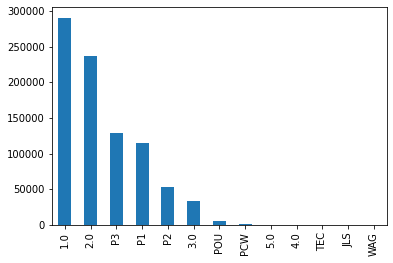

In [7]:
f1(data,"Area Id")

#### (2) Beat

共有 58 种类 Beat


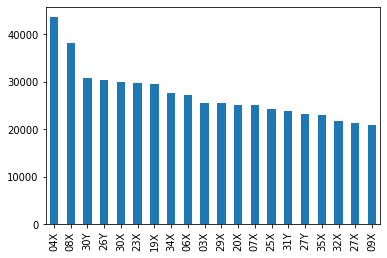

In [8]:
f1(data,"Beat")

#### (3) Incident Type Id & Description

共有 288 种类 Incident Type Id


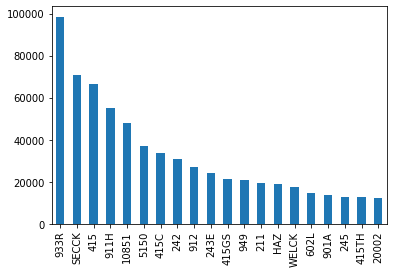

In [9]:
f1(data,"Incident Type Id")

共有 288 种类 Incident Type Description


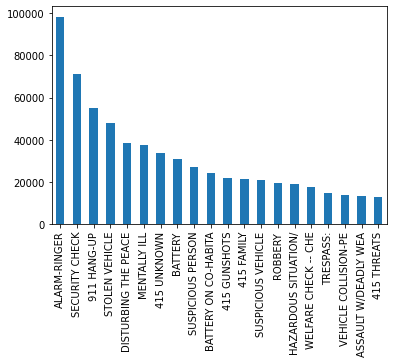

In [44]:
f1(data,"Incident Type Description")

### 数值属性
#### Priority

In [10]:
def f2(s,name):
    d = s[name].describe()
    print(name+" 五数："+str(d["min"])+", "+str(d["25%"])+", "+str(d["50%"])+", "+str(d["75%"])+", "+str(d["max"]))
    nc = s[name].size - s[name].count()
    print("缺失值数量："+str(nc))

In [11]:
f2(data,"Priority")

Priority 五数：0.0, 2.0, 2.0, 2.0, 2.0
缺失值数量：0


## 数据可视化
#### Priority

In [12]:
def f3(s,name,upp=None):
    p = s[name]
    if upp is not None:
        p = p[p<=upp]
    p.plot.hist()

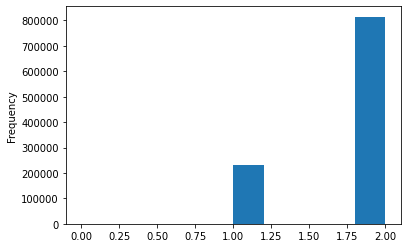

In [13]:
f3(data,"Priority")

虽然五数中有最小值 0，但是图上看不出来。以下列表说明 0 的值确实非常少。

In [14]:
data["Priority"].value_counts()

2.0    814818
1.0    231542
0.0        24
Name: Priority, dtype: int64

## 数据缺失
数值属性没有缺失，但是标称属性 `Area Id` 和 `Beat` 有缺失。

In [15]:
data["Area Id"].size - data["Area Id"].count()

182361

In [16]:
data["Beat"].size - data["Beat"].count()

5801

#### (1) 将缺失部分剔除

In [17]:
data1 = data[data["Area Id"].notna()]
data1 = data1[data1["Beat"].notna()]

In [18]:
data1

,Agency,Create Time,Area Id,Beat,Priority,Incident Type Id,Incident Type Description,Event Number,Closed Time
0,OP,2011-01-01T00:00:00.000,1,06X,1.0,PDOA,POSSIBLE DEAD PERSON,LOP110101000001,2011-01-01T00:28:17.000
1,OP,2011-01-01T00:01:11.000,1,07X,1.0,415GS,415 GUNSHOTS,LOP110101000002,2011-01-01T01:12:56.000
2,OP,2011-01-01T00:01:25.000,1,10Y,2.0,415GS,415 GUNSHOTS,LOP110101000003,2011-01-01T00:07:20.000
3,OP,2011-01-01T00:01:35.000,2,21Y,2.0,415GS,415 GUNSHOTS,LOP110101000005,2011-01-01T00:02:28.000
4,OP,2011-01-01T00:02:10.000,2,20X,1.0,415GS,415 GUNSHOTS,LOP110101000004,2011-01-01T00:50:04.000
...,...,...,...,...,...,...,...,...,...
1046382,OP,2016-07-31T23:43:51.000,P1,02Y,2.0,922,DRUNK ON THE STREET,LOP160731000889,2016-08-01T00:36:46.000
1046383,OP,2016-07-31T23:45:50.000,P1,02Y,2.0,415GS,415 GUNSHOTS,LOP160731000892,2016-07-31T23:58:03.000
1046384,OP,2016-07-31T23:50:54.000,P3,26Y,2.0,415N,DISTURBANCE-NEIGHBOR,LOP160731000893,2016-08-01T00:08:00.000
1046385,OP,2016-07-31T23:56:29.000,P2,19X,2.0,912,SUSPICIOUS PERSON,LOP160731000895,2016-08-01T01:33:31.000


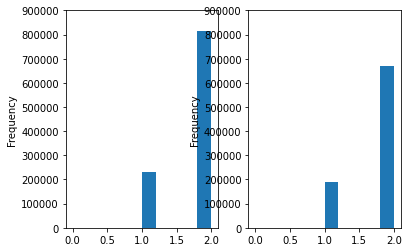

In [19]:
plt.subplot(1,2,1)
plt.ylim([0,900000])
f3(data,"Priority")
plt.subplot(1,2,2)
plt.ylim([0,900000])
f3(data1,"Priority")

#### (2) 用最高频率值来填补缺失值

In [20]:
def subplots(f,s,t,name,upp=None,ymax=None):
    plt.subplot(1,2,1)
    if ymax is not None:
        plt.ylim([0,ymax])
    f(s,name,upp)
    plt.subplot(1,2,2)
    if ymax is not None:
        plt.ylim([0,ymax])
    f(t,name,upp,info=False)

In [21]:
data2 = data.copy(True)
v21 = data2["Area Id"].value_counts().index[0]
print("Area Id 填充值为 "+str(v21))
data2["Area Id"] = data2["Area Id"].fillna(v21)
v22 = data2["Beat"].value_counts().index[0]
print("Beat 填充值为 "+str(v22))
data2["Beat"] = data2["Beat"].fillna(v22)

Area Id 填充值为 1.0
Beat 填充值为 04X


共有 13 种类 Area Id


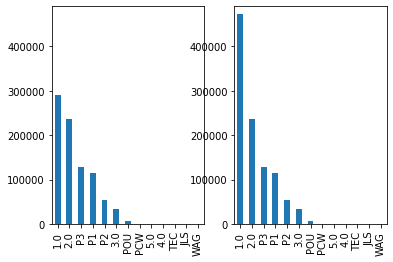

In [22]:
subplots(f1,data,data2,"Area Id",ymax=490000)

共有 58 种类 Beat


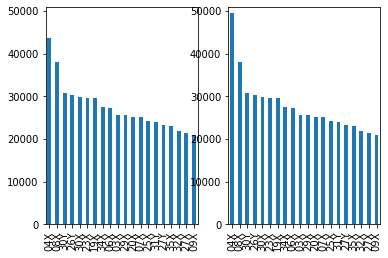

In [23]:
subplots(f1,data,data2,"Beat",ymax=51000)

#### (4) 通过数据对象之间的相似性来填补缺失值

In [24]:
data4 = data.copy(True)
data4["Area Id"]=data4["Area Id"].ffill()
data4["Beat"]=data4["Beat"].ffill()

共有 13 种类 Area Id


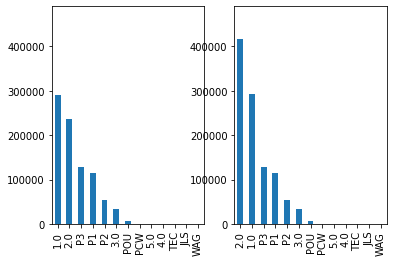

In [25]:
subplots(f1,data,data4,"Area Id",ymax=490000)

共有 58 种类 Beat


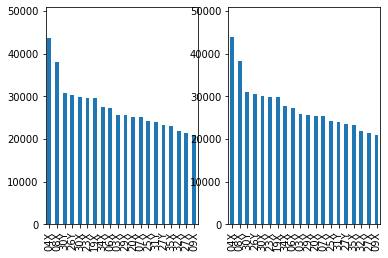

In [26]:
subplots(f1,data,data4,"Beat",ymax=51000)